## Load data and Preprocessing data

In [ ]:
from google.colab import drive
drive.mount("/drive")

Mounted at /drive


In [ ]:
import pandas as pd
from numpy import nan

data = pd.read_csv("/drive/My Drive/Colab Notebooks/CCST Survey_20221109_Text_Answers.csv")
corpus = data['wireless.network.feedback'].tolist()
print(corpus)
#drop NA values in corpus
corpus=[item for item in corpus if not(pd.isnull(item)) == True]
print(corpus)

['none', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'Can be spotty.', "Since we don't have a physical presence in DC, I no longer use AirOrangeX unless on campus.", 'I find it to be spotty at times even within the building I work in.  ', nan, nan, nan, nan, 'There are still some areas of the building where wifi is a bit spotty, but overall it works well.', nan, nan, nan, nan, nan, nan, nan, 'frequently get kicked off on my iphone. On my desktop, takes restarts during the day to connect to g drive', 'As a new employee, explicit instructions of what network to join and how to do so, on first day of employment, would have been helpful.  Perhaps include in new employee onboarding training.', nan, nan, nan, nan, nan, nan, nan, 'Wish there was a way to prevent use of hotspots', 'No issues.. strong signal.', 'Speed and connectivity are great across most of campus.', nan, nan, 'Many times, I am not able to connect or the connection drops', nan, nan, nan, na

In [ ]:
#print size in corpus

print('size of dissatisfation texts is', len(corpus))

size of dissatisfation texts is 604


# KMeans


tfidf representation

In [ ]:
# tfidf representation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

553


In [ ]:
from sklearn.cluster import KMeans

K = 5
tfidf_model = KMeans(n_clusters=K, random_state=0)
tfidf_model.fit(tfidf)
labels=tfidf_model.labels_.tolist() 

In [ ]:
#  print cluster sizes
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0)+1
  print(cnt_perCluster)

In [ ]:
print_cluster_sizes(tfidf_model)

{2: 374, 1: 30, 4: 102, 0: 42, 3: 56}


In [ ]:
# print documents closest to each centroid
import numpy as np
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j]
    idx = np.argsort(d)[:n]
    print('\n\n======cluster #', j)
    for i in idx:
      print(corpus[i])

In [ ]:
print_docs_closest_to_centroids(tfidf_model, tfidf, 5)



======cluster # 0
none
It rocks!
N/a
I have had no porblems
NONE


======cluster # 1
Can be spotty.
Spotty connections
It's spotty sometimes. 
Can be spotty. 
It is spotty


======cluster # 2
none
NONE
N/a
N.A.
None


======cluster # 3
none
N
none
satisfactory
it ask me for domain name


======cluster # 4
none
It rocks!
None
N.A.
It seems adequate.


In [ ]:
# Plot the inertia graph
import matplotlib.pyplot as plt
def plot_inertia(inertia_list):
  plt.plot(range(1,len(inertia_list)+1), inertia_list, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method using Inertia')
  plt.show()

In [ ]:
# use the Elbow method to determine the best k
def elbow(m, corpus):
  inertia_lst = []
  for i in range(1,m+1):
    model = KMeans(n_clusters=i)
    model.fit(corpus)
    
    inertia=model.inertia_
    inertia_lst.append(inertia)
  plot_inertia(inertia_lst)

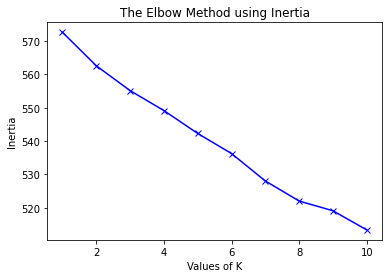

In [ ]:
elbow(10, tfidf)

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


unigram representation

In [ ]:
# unigram representation
from sklearn.feature_extraction.text import CountVectorizer
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, stop_words='english')
uni = unigram_count_vectorizer.fit_transform(corpus)
uni_feature_names = unigram_count_vectorizer.get_feature_names_out()
print(len(unigram_count_vectorizer.vocabulary_))

1364


In [ ]:
from sklearn.cluster import KMeans

K = 5
uni_model = KMeans(n_clusters=K, random_state=0)
uni_model.fit(uni)
labels=uni_model.labels_.tolist() 

In [ ]:
#  print cluster sizes
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0)+1
  print(cnt_perCluster)

In [ ]:
# print documents closest to each centroid
import numpy as np
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j]
    idx = np.argsort(d)[:n]
    print('\n\n======cluster #', j)
    for i in idx:
      print(corpus[i])

In [ ]:
print_docs_closest_to_centroids(uni_model, uni, 5)



======cluster # 0
none
None
N
None
None


======cluster # 1
When students can't connect on their laptops, it can bring my class to a halt. Because the expectation of my department and my students is that everything should be paperless, I rely on connectivity to foster interactive class activities, peer review sessions, in-class research workshops, sharing handouts, and other activities vital to the writing studio.
It is unstable at times when I show videos in class. 
It is sometimes difficult for students to connect to the internet while using their laptops in my office. 
Never had an issue.  I have heard from students who have had issues in the past though.
I can almost never get connected and when I can, I can't stay connected. I most often have to lean on eduroam. In nearly every class I teach students complain they cannot access the wireless network.


======cluster # 2
Not on campus
none
N/a
N
none


======cluster # 3
none
N/a
None
None
none


======cluster # 4
In 2022, why is i

In [ ]:
# Plot the inertia graph
import matplotlib.pyplot as plt
def plot_inertia(inertia_list):
  plt.plot(range(1,len(inertia_list)+1), inertia_list, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method using Inertia')
  plt.show()

In [ ]:
# use the Elbow method to determine the best k
def elbow(m, corpus):
  inertia_lst = []
  for i in range(1,m+1):
    model = KMeans(n_clusters=i)
    model.fit(corpus)
    
    inertia=model.inertia_
    inertia_lst.append(inertia)
  plot_inertia(inertia_lst)

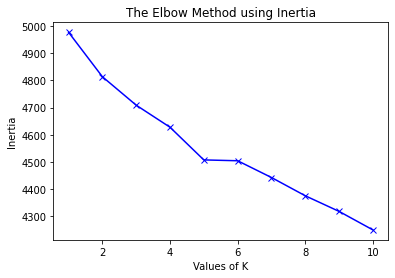

In [ ]:
elbow(10, uni)

# LDA


In [ ]:
!pip install bertopic
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 9.6 MB/s 
     |████████████████████████████████| 85 kB 5.0 MB/s 
     |████████████████████████████████| 636 kB 49.3 MB/s 
     |████████████████████████████████| 88 kB 7.2 MB/s 
     |████████████████████████████████| 5.2 MB 43.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.5 MB 44.7 MB/s 
     |████████████████████████████████| 1.3 MB 63.4 MB/s 
     |████████████████████████████████| 182 kB 47.7 MB/s 
     |████████████████████████████████| 7.6 MB 40.1 MB/s 
     |████████████████████████████████| 1.1 MB 78.6 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340735 sha256=347a010e96668c1e967b064f6753a9bdf015a796441590853848dcdfea52c7c3
  Stored in directory: /root/.cache

In [ ]:
#LDA

# removing stopwords usually improve topic models
# stoplist is often customized to include more domain-specific topic words

from sklearn.feature_extraction import text

added_stopwords = frozenset(['just', 'did'])
my_stopwords = text.ENGLISH_STOP_WORDS.union(added_stopwords)
print(len(my_stopwords))
print(my_stopwords)

320
frozenset({'etc', 'and', 'seems', 'its', 'would', 'show', 'be', 'they', 'indeed', 'she', 'if', 'none', 'almost', 'something', 'moreover', 'twenty', 'below', 'fire', 'hers', 'to', 'empty', 'perhaps', 'while', 'yet', 'same', 'more', 'nothing', 'her', 'con', 'himself', 'hundred', 'amongst', 'but', 'as', 'thin', 'twelve', 'ourselves', 'thence', 'cannot', 'no', 'part', 'anyway', 'somehow', 'except', 'you', 'without', 'back', 'until', 'somewhere', 'wherever', 'very', 'mine', 'around', 'sixty', 'down', 'go', 'one', 'few', 'anyone', 'inc', 'not', 'behind', 'get', 'side', 'still', 'enough', 'next', 'once', 'herself', 'put', 'alone', 'namely', 'within', 'interest', 'see', 'fifty', 'besides', 'many', 'since', 'less', 'hereafter', 'now', 'hereupon', 'again', 'though', 'whom', 'throughout', 'a', 'therein', 'call', 'other', 'cry', 'has', 'them', 'the', 'whereby', 'for', 'us', 'of', 'hereby', 'whether', 'full', 'beforehand', 'what', 'co', 'thru', 'elsewhere', 'everywhere', 'becomes', 'been', 'whi

Tf-idf representation

In [ ]:
# tfidf usually help improve topic models

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=my_stopwords)
tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

551


In [ ]:
# call the LDA algorithm to fit a topic model, and transform all documents to their topic distrinbutions

from sklearn.decomposition import NMF, LatentDirichletAllocation
no_topics = 5

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z = lda.fit_transform(tfidf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        no_top_words = 5
no_top_words = 5
display_topics(lda, tfidf_feature_names, no_top_words)

Topic 0:
work works campus good use
Topic 1:
slow issues students times connectivity
Topic 2:
used time campus access dependable
Topic 3:
spotty times areas trouble signal
Topic 4:
reliable connect fast difficult wireless


In [ ]:
# now examine the topic distribution in each document
# since each document is considered a mixture of all topics with different probabilities

# lda_z stores the prob distribution for each document
# for the 20newsgroup dataset, it is a 11314*15 matrix
# 11314 documents, 15 topics

# examine document #5 (index starts at 0)
# high prob for topics #13 (index starts at 0), with probs 0.55
# the document reads as related to religion

print(lda_z.shape)
print(lda_z[0])
#print(documents.shape)

(604, 5)
[0.2 0.2 0.2 0.2 0.2]


Unigram representation

In [ ]:
# unigram representation
from sklearn.feature_extraction.text import CountVectorizer
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, stop_words='english')
uni = unigram_count_vectorizer.fit_transform(corpus)
uni_feature_names = unigram_count_vectorizer.get_feature_names_out()
print(len(unigram_count_vectorizer.vocabulary_))

1364


In [ ]:
# call the LDA algorithm to fit a topic model, and transform all documents to their topic distrinbutions

from sklearn.decomposition import NMF, LatentDirichletAllocation
no_topics = 5

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z = lda.fit_transform(uni)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        no_top_words = 5
no_top_words = 5
display_topics(lda, uni_feature_names, no_top_words)

Topic 0:
reliable fast works wifi fine
Topic 1:
connect wireless network issues campus
Topic 2:
work connection works times time
Topic 3:
use campus don network wireless
Topic 4:
good service spotty dome worked


In [ ]:
print(lda_z.shape)
print(lda_z[0])
#print(documents.shape)

(604, 5)
[0.2 0.2 0.2 0.2 0.2]


# BERTopic

In [ ]:
!pip install bertopic
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# obtain topic modelling results
print(len(corpus))

from bertopic import BERTopic
topic_model = BERTopic(embedding_model="all-MiniLM-L12-v2", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(corpus)

604


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/19 [00:00<?, ?it/s]

2022-11-28 22:12:36,960 - BERTopic - Transformed documents to Embeddings
2022-11-28 22:12:44,539 - BERTopic - Reduced dimensionality
2022-11-28 22:12:44,587 - BERTopic - Clustered reduced embeddings


In [ ]:
# After generating topics and their probabilities, we can access the frequent topics that were generated
# -1 refers to all outliers and should typically be ignored. 

freq = topic_model.get_topic_info(); 
num_topics = len(freq) -1
print(num_topics)
freq.head(num_topics)

13


Topic  Count                             Name
0      -1    116                  -1_the_it_to_is
1       0     94        0_to_it_connect_sometimes
2       1     87        1_wireless_the_network_is
3       2     48             2_the_to_students_my
4       3     45          3_airorangex_to_the_and
5       4     37               4_works_it_well_me
6       5     30          5_campus_on_it_building
7       6     26             6_don_issues_had_use
8       7     24         7_reliable_fast_very_and
9       8     22               8_dome_in_the_work
10      9     21     9_spotty_coverage_some_areas
11     10     20  10_none_remote_comment_feedback
12     11     19        11_signal_in_the_building

In [ ]:
for i in range(num_topics):
  print("\n== Representative documents in cluster #", i)
  print(topic_model.get_representative_docs(i))


== Representative documents in cluster # 0
["It's gotten a lot easier to log on, etc over the years. ", 'Drops often and will not let me reconnect', 'Slow, unreliable, and hard to connect on mobile phones']

== Representative documents in cluster # 1
['In general, I have no issues with the wireless signal on campus. I chose "agree" over "strongly agree" for the few times where the signal is low and slow to respond or upload content.', "My experience with the campus wireless network has been very positive and I've had no connectivity issues. On one occasion, my personal belongings were locked in a rental vehicle in Manley parking lot, including my phone. I had access to my personal iPad though, that thankfully picked up the campus wireless signal and allowed my to facetime my husband for assistance. ", "Since I am off campus, I don't have any experience with the wireless on campus."]

== Representative documents in cluster # 2
['I only teach remotely so this does not apply to me.', 'St

In [ ]:
topic_model.find_topics("login",top_n=20)

([2, 0, 1, 11, 5, -1, 3, 10, 6, 8, 4, 12, 9, 7],
 [0.39330502196987294,
  0.38215909168704887,
  0.3467641187613645,
  0.3307893962137891,
  0.30976127759432304,
  0.30887985335788065,
  0.30364119185102156,
  0.3032985987953389,
  0.30252686789390704,
  0.2988188947642827,
  0.27927417777806673,
  0.27713680158008475,
  0.27152930740472697,
  0.19783318357111906])

In [ ]:
topic_model.get_topic(1)  # Select the most frequent topic

[('wireless', 0.07089721703664857),
 ('the', 0.05557484997097197),
 ('network', 0.05056702701642951),
 ('is', 0.04341968956131297),
 ('campus', 0.03690812428153811),
 ('to', 0.03153346066583827),
 ('with', 0.03145261266273282),
 ('it', 0.029618530568733287),
 ('in', 0.02933057213813323),
 ('use', 0.028562223712534602)]

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_distribution(probs[2], min_probability=0.005)

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [ ]:
topic_model.visualize_barchart(top_n_topics=10)

## SBERT


In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.6 MB/s 
     |████████████████████████████████| 5.8 MB 45.4 MB/s 
     |████████████████████████████████| 1.3 MB 47.8 MB/s 
     |████████████████████████████████| 182 kB 47.5 MB/s 
     |████████████████████████████████| 7.6 MB 61.3 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=01ec60175d0619b29955c00b58cd7daaafbd1f5c623350838dc3ca3e9e98435c
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
sbert_embeddings = embedder.encode(corpus)

In [ ]:
K = 5  # change number of cluster if applicable
from sklearn.cluster import KMeans
sbert_model = KMeans(n_clusters=K, random_state=1337)
sbert_model.fit(sbert_embeddings)
labels=sbert_model.labels_.tolist()  # Save cluster labels in a separate list

In [ ]:
#  print cluster sizes
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0)+1
  print(cnt_perCluster)
print_cluster_sizes(sbert_model)

{2: 59, 0: 100, 3: 170, 1: 141, 4: 134}


In [ ]:
# print documents closest to each centroid
import numpy as np
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j]
    idx = np.argsort(d)[:n]
    print('\n\n======cluster #', j)
    for i in idx:
      print(corpus[i])
print_docs_closest_to_centroids(sbert_model, sbert_embeddings, 10)



======cluster # 0
It's terrible in the Dome and consistently inconsistently across campus and outdoors.
service is not that good in the dome or on south campus
It almost always works around various spots on campus 
It's pretty good when available. Only improvements in terms of "working" would be outside - between buildings - on campus. 
It's usually okay in my building, but there are dead areas in and around the building in which I wish signal was stronger.
It doesn't work very well just outside the building
The signal can be quite weak even in my office on main campus.
It works fine, even in the sub-basement at 130 College Place
There are still some areas of the building where wifi is a bit spotty, but overall it works well.
It'd be nice if it worked better outdoors on campus.


======cluster # 1
sometimes problematic to connect
Often it is very slow, my devices have a hard time connecting.
it takes sometimes minutes to get a connection
Can not remember ever having a problem with co